# SDDS Final Project - Recidivism

## Team 1

**Team Members:**
* Andrew Cox
* Edgar Cruz Ocampo
* Jinzo Nakakawa Montes de Oca
* Michael Stankiewicz

### Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
import joblib
import pickle
import plotly.express as px

### Importing Dataset

In [7]:
recividism_df = pd.read_csv('Dataset/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')

In [8]:
recividism_df

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,26756,M,BLACK,23-27,9,False,5.0,Standard,At least some college,1,...,0.000000,0.0,0.189507,0.572044,False,True,True,False,False,1
25831,26758,M,WHITE,38-42,25,False,5.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.757098,0.576104,False,True,False,True,False,1
25832,26759,M,BLACK,33-37,15,False,5.0,Standard,At least some college,3 or more,...,NaN,NaN,0.711138,0.894125,False,True,False,True,False,1
25833,26760,F,WHITE,33-37,15,NaN,5.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.000000,0.000000,True,False,False,False,False,1


### Data Dictionary

**Add Something Here**

### EDA

**Whats the size of this dataset?**

In [13]:
recividism_df.shape

(25835, 54)

**Whats the current percentage of recidivism?**

In [15]:
recividism_df["Recidivism_Within_3years"].sum() * 100 / recividism_df.shape[0]

57.689181343139154

**What is the average years of prison for a convict?**

In [17]:
set(recividism_df["Prison_Years"])

{'1-2 years',
 'Greater than 2 to 3 years',
 'Less than 1 year',
 'More than 3 years'}

In [18]:
prison_years_2 = (recividism_df["Prison_Years"] == '1-2 years').sum()
prison_years_3 = (recividism_df["Prison_Years"] == 'Greater than 2 to 3 years').sum()
prison_years_1 = (recividism_df["Prison_Years"] == 'Less than 1 year').sum()
prison_years_3plus = (recividism_df["Prison_Years"] == 'More than 3 years').sum()

In [19]:
avg_prison_years = (prison_years_1 * 0.5 + prison_years_2 * 1.5 + prison_years_3 * 2.5 + prison_years_3plus * 5) / recividism_df.shape[0]
avg_prison_years

2.095897038900716

**What is the distribution for recividism in the State of Georgia?**

In [21]:
recividism_y1 = recividism_df["Recidivism_Arrest_Year1"].sum()
recividism_y2 = recividism_df["Recidivism_Arrest_Year2"].sum()
recividism_y3 = recividism_df["Recidivism_Arrest_Year3"].sum()
no_recividism = (recividism_df["Recidivism_Within_3years"] == False).sum()

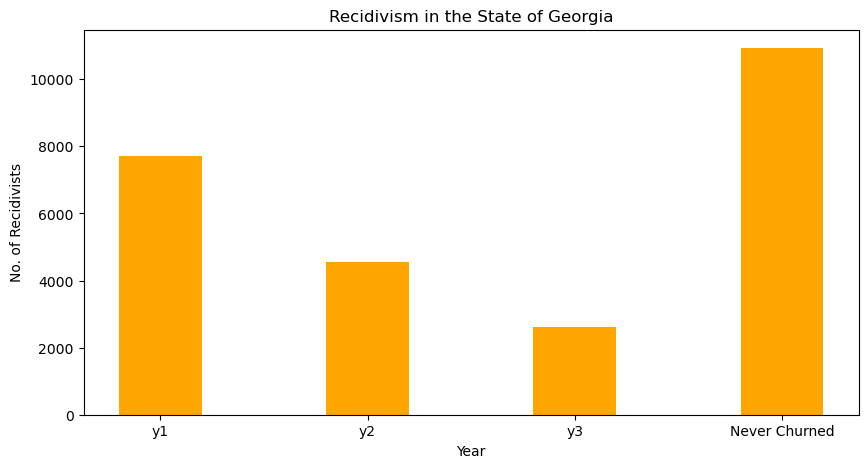

In [22]:
# creating the dataset
data = {'y1':recividism_y1, 'y2':recividism_y2, 'y3':recividism_y3, 'Never Churned':no_recividism}
labels = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(labels, values, color ='Orange', 
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("No. of Recidivists")
plt.title("Recidivism in the State of Georgia")
plt.show()

**Dropping null values**

In [24]:
recividism_df = recividism_df.dropna()

**Summarizing Data**

In [26]:
for key in recividism_df.keys():
    print(key, 
          "\n Data Type: ", recividism_df[key].dtype, 
          "\n Nulls?: ", recividism_df[key].isnull().values.any(),
          "\n Num of Nulls: ", recividism_df[key].isnull().sum())
    
    if recividism_df[key].dtype == object:
        print(" Possible Values: ", set(recividism_df[key]))
        
    elif recividism_df[key].dtype == np.int64 or recividism_df[key].dtype == np.float64:
        print(" Min Value: ", recividism_df[key].min(), 
              "\n Max Value: ", recividism_df[key].max(),
              "\n Average: ", recividism_df[key].mean())
    
    print("\n")

ID 
 Data Type:  int64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  1 
 Max Value:  26734 
 Average:  13103.097035991532


Gender 
 Data Type:  object 
 Nulls?:  False 
 Num of Nulls:  0
 Possible Values:  {'M'}


Race 
 Data Type:  object 
 Nulls?:  False 
 Num of Nulls:  0
 Possible Values:  {'WHITE', 'BLACK'}


Age_at_Release 
 Data Type:  object 
 Nulls?:  False 
 Num of Nulls:  0
 Possible Values:  {'28-32', '33-37', '18-22', '43-47', '48 or older', '38-42', '23-27'}


Residence_PUMA 
 Data Type:  int64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  1 
 Max Value:  25 
 Average:  12.314890613973184


Gang_Affiliated 
 Data Type:  object 
 Nulls?:  False 
 Num of Nulls:  0
 Possible Values:  {False, True}


Supervision_Risk_Score_First 
 Data Type:  float64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  1.0 
 Max Value:  10.0 
 Average:  6.42484121383204


Supervision_Level_First 
 Data Type:  object 
 Nulls?:  False 
 Num of Nulls:  0
 Possible Values:  {'Specialized', 'St

### ETL

**Data balance after droping null values**

In [29]:
recividism_df["Recidivism_Within_3years"].sum() * 100 / recividism_df.shape[0]

59.4424841213832

**Encoding Ordinal Data**

In [31]:
ordinal_encoders = {"Age_at_Release": ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older'],
                    "Supervision_Level_First": ['Standard', 'High', 'Specialized'], 
                    "Education_Level": ['Less than HS diploma', 'High School Diploma', 'At least some college'], 
                    "Prison_Years": ['Less than 1 year', '1-2 years', 'Greater than 2 to 3 years', 
                                     'More than 3 years']}

In [32]:
for key, value in ordinal_encoders.items():
    data = recividism_df[key]
    enc = OrdinalEncoder(categories=[value])
    X = np.array([[item] for item in data])
    X_encoded = [item[0] for item in enc.fit_transform(X)]
    
    recividism_df[key] = X_encoded

/var/folders/k_/5qmxl0s91nb9ycrdsm2jyfyr0000gn/T/ipykernel_16400/3854612225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recividism_df[key] = X_encoded
/var/folders/k_/5qmxl0s91nb9ycrdsm2jyfyr0000gn/T/ipykernel_16400/3854612225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recividism_df[key] = X_encoded
/var/folders/k_/5qmxl0s91nb9ycrdsm2jyfyr0000gn/T/ipykernel_16400/3854612225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

**Cleaning integer fields**

In [34]:
def can_cast(source_type):
    try:
        int(source_type)
        return True
    except ValueError:
        return False

In [35]:
for key in recividism_df.keys():
    if recividism_df[key].dtype == object and can_cast(sorted(list(set(recividism_df[key])))[0]) == True and not isinstance(list(set(recividism_df[key]))[0], bool):
        temp_list = []
        
        for value in recividism_df[key]:
            if len(value.split(" ")) > 1:
                temp_list.append(int(value.split(" ")[0]))
            else:
                temp_list.append(int(value))
        
        recividism_df[key] = temp_list 

/var/folders/k_/5qmxl0s91nb9ycrdsm2jyfyr0000gn/T/ipykernel_16400/1600613716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recividism_df[key] = temp_list


**Cleaning bool fields**

In [37]:
recividism_df["Gang_Affiliated"] = recividism_df["Gang_Affiliated"].astype(bool)

/var/folders/k_/5qmxl0s91nb9ycrdsm2jyfyr0000gn/T/ipykernel_16400/1869869355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recividism_df["Gang_Affiliated"] = recividism_df["Gang_Affiliated"].astype(bool)


In [38]:
for key in recividism_df.keys():
    if recividism_df[key].dtype == bool:
        recividism_df[key] = recividism_df[key].astype(int)

/var/folders/k_/5qmxl0s91nb9ycrdsm2jyfyr0000gn/T/ipykernel_16400/3597799592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recividism_df[key] = recividism_df[key].astype(int)
/var/folders/k_/5qmxl0s91nb9ycrdsm2jyfyr0000gn/T/ipykernel_16400/3597799592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recividism_df[key] = recividism_df[key].astype(int)
/var/folders/k_/5qmxl0s91nb9ycrdsm2jyfyr0000gn/T/ipykernel_16400/3597799592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

**Encoding categorical data fields**

In [40]:
recividism_df = pd.get_dummies(recividism_df, columns = ["Prison_Offense", "Race"])

**Scaling Numeric Fields**

In [42]:
num_fields = []

for key in recividism_df.keys():
    if recividism_df[key].dtype == np.int64 or recividism_df[key].dtype == np.float64:
        if recividism_df[key].max() > 1:
            num_fields.append(key)
            
print(num_fields)


['ID', 'Age_at_Release', 'Residence_PUMA', 'Supervision_Risk_Score_First', 'Supervision_Level_First', 'Education_Level', 'Dependents', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 'Delinquency_Reports', 'Program_Attendances', 'Program_UnexcusedAbsences', 'Residence_Changes', 'Avg_Days_per_DrugTest', 'Jobs_Per_Year']


In [43]:
fields = ['Age_at_Release', 'Supervision_Risk_Score_First', 'Supervision_Level_First', 
          'Education_Level', 'Dependents', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 
          'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 
          'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 
          'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Prop', 
          'Prior_Conviction_Episodes_Drug', 'Delinquency_Reports', 'Program_Attendances', 
          'Program_UnexcusedAbsences', 'Residence_Changes', 'Avg_Days_per_DrugTest', 'Jobs_Per_Year']

numeric_data = recividism_df[fields].values

scaler = StandardScaler()
scaler.fit(numeric_data)
scaled_data = scaler.transform(numeric_data)

scaled_df = pd.DataFrame(scaled_data)
scaled_df.columns = fields

for field in fields:
    recividism_df[field] = list(scaled_df[field])

In [44]:
recividism_df

,ID,Gender,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Years,...,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Prison_Offense_Drug,Prison_Offense_Other,Prison_Offense_Property,Prison_Offense_Violent/Non-Sex,Prison_Offense_Violent/Sex,Race_BLACK,Race_WHITE
0,1,M,1.194060,16,0,-1.471737,-1.179783,1.777331,1.298708,1.417492,...,0,0,1,True,False,False,False,False,True,False
1,2,M,0.125585,16,0,-0.182565,1.183786,-1.077762,-0.351388,1.417492,...,0,1,1,False,False,False,True,False,True,False
2,3,M,1.728297,24,0,0.247160,0.002002,1.777331,1.298708,-0.368632,...,1,0,1,True,False,False,False,False,True,False
3,4,M,0.659823,16,0,0.247160,0.002002,-1.077762,-0.351388,-0.368632,...,0,0,1,False,False,True,False,False,False,True
4,5,M,0.125585,16,0,-1.042013,1.183786,-1.077762,1.298708,-0.368632,...,0,0,1,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25773,26695,M,-0.408652,8,0,-0.182565,-1.179783,0.349784,1.298708,-1.261695,...,0,0,1,True,False,False,False,False,False,True
25782,26704,M,-0.408652,9,0,-1.042013,-1.179783,1.777331,0.473660,-1.261695,...,1,0,1,True,False,False,False,False,False,True
25799,26724,M,-0.942889,21,0,-0.182565,0.002002,0.349784,1.298708,-1.261695,...,0,0,1,True,False,False,False,False,True,False
25804,26730,M,1.728297,15,0,-1.901461,-1.179783,1.777331,1.298708,-1.261695,...,0,0,1,False,False,True,False,False,False,True


### Correlation Plot and Feature Selection

In [46]:
for key in recividism_df.keys():
    print(key, 
          "\n Data Type: ", recividism_df[key].dtype, 
          "\n Nulls?: ", recividism_df[key].isnull().values.any(),
          "\n Num of Nulls: ", recividism_df[key].isnull().sum())
    
    if recividism_df[key].dtype == object:
        print(" Possible Values: ", set(recividism_df[key]))
        
    elif recividism_df[key].dtype == np.int64 or recividism_df[key].dtype == np.float64:
        print(" Min Value: ", recividism_df[key].min(), 
              "\n Max Value: ", recividism_df[key].max(),
              "\n Average: ", recividism_df[key].mean())
    
    print("\n")

ID 
 Data Type:  int64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  1 
 Max Value:  26734 
 Average:  13103.097035991532


Gender 
 Data Type:  object 
 Nulls?:  False 
 Num of Nulls:  0
 Possible Values:  {'M'}


Age_at_Release 
 Data Type:  float64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  -1.4771264739025085 
 Max Value:  1.7282971665985578 
 Average:  3.209226188330728e-17


Residence_PUMA 
 Data Type:  int64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  1 
 Max Value:  25 
 Average:  12.314890613973184


Gang_Affiliated 
 Data Type:  int64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  0 
 Max Value:  1 
 Average:  0.18539167254763586


Supervision_Risk_Score_First 
 Data Type:  float64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  -2.331185037510421 
 Max Value:  1.5363319110222182 
 Average:  -1.5243824394570958e-16


Supervision_Level_First 
 Data Type:  float64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  -1.179783096918165 
 Max Value:  1.18378631964204

In [47]:
sub_recidivism_df = recividism_df.drop(["ID", "Training_Sample", "Recidivism_Arrest_Year1",
                                        "Recidivism_Arrest_Year2", "Recidivism_Arrest_Year3",
                                        "Gender"], axis=1)

<Axes: >

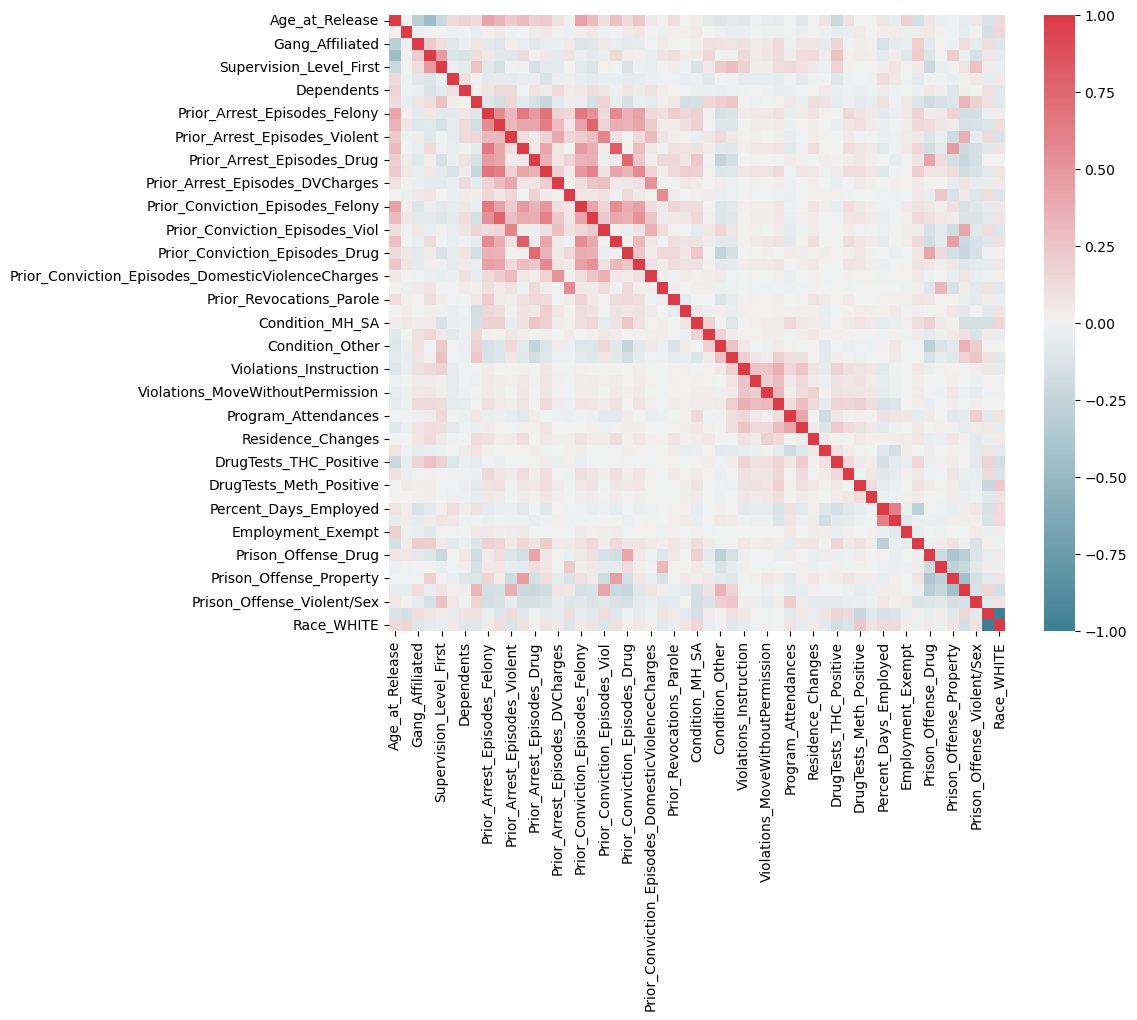

In [48]:
f, ax = plt.subplots(figsize=(10, 8))
corr = sub_recidivism_df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

**Rank of correlated variables with resividism**

In [50]:
corr["Recidivism_Within_3years"].abs().sort_values(ascending=False)

Recidivism_Within_3years                             1.000000
Percent_Days_Employed                                0.284528
Supervision_Risk_Score_First                         0.202930
Prior_Arrest_Episodes_PPViolationCharges             0.196993
Gang_Affiliated                                      0.191748
Prior_Arrest_Episodes_Felony                         0.174594
Age_at_Release                                       0.162783
Prior_Arrest_Episodes_Property                       0.156240
DrugTests_THC_Positive                               0.147587
Prior_Arrest_Episodes_Misd                           0.144108
Prior_Conviction_Episodes_Misd                       0.140336
Prior_Conviction_Episodes_Prop                       0.136070
Prison_Offense_Violent/Sex                           0.123734
Prison_Years                                         0.112673
Condition_MH_SA                                      0.110294
Prior_Conviction_Episodes_Felony                     0.090126
DrugTest

### Modeling and Testing

In [52]:
recividism_df = pd.read_csv('Dataset/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')

In [53]:
def can_cast(source_type):
    try:
        int(source_type)
        return True
    except ValueError:
        return False

In [54]:
recividism_df = recividism_df.dropna()

ordinal_encoders = {"Age_at_Release": ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older'],
                    "Supervision_Level_First": ['Standard', 'High', 'Specialized'], 
                    "Education_Level": ['Less than HS diploma', 'High School Diploma', 'At least some college'], 
                    "Prison_Years": ['Less than 1 year', '1-2 years', 'Greater than 2 to 3 years', 
                                     'More than 3 years']}

for key, value in ordinal_encoders.items():
    data = recividism_df[key]
    enc = OrdinalEncoder(categories=[value])
    X = np.array([[item] for item in data])
    X_encoded = [item[0] for item in enc.fit_transform(X)]
    
    recividism_df[key] = X_encoded

for key in recividism_df.keys():
    if recividism_df[key].dtype == object and can_cast(sorted(list(set(recividism_df[key])))[0]) == True and not isinstance(list(set(recividism_df[key]))[0], bool):
        temp_list = []
        
        for value in recividism_df[key]:
            if len(value.split(" ")) > 1:
                temp_list.append(int(value.split(" ")[0]))
            else:
                temp_list.append(int(value))
        
        recividism_df[key] = temp_list 

recividism_df["Gang_Affiliated"] = recividism_df["Gang_Affiliated"].astype(bool)

for key in recividism_df.keys():
    if recividism_df[key].dtype == bool:
        recividism_df[key] = recividism_df[key].astype(int)

recividism_df = pd.get_dummies(recividism_df, columns = ["Prison_Offense", "Race"])

fields_to_keep = ["Percent_Days_Employed", "Supervision_Risk_Score_First", "Prior_Arrest_Episodes_PPViolationCharges",
                  "Gang_Affiliated", "Prior_Arrest_Episodes_Felony", "Age_at_Release", "Prior_Arrest_Episodes_Property",
                  "DrugTests_THC_Positive", "Prior_Arrest_Episodes_Misd", "Prior_Conviction_Episodes_Misd",
                  "Prior_Conviction_Episodes_Prop", "Prison_Offense_Violent/Sex", "Prison_Years", "Condition_MH_SA",
                  "Training_Sample", "Recidivism_Within_3years"]

recividism_df = recividism_df[fields_to_keep]

In [55]:
for key in recividism_df.keys():
    print(key, 
          "\n Data Type: ", recividism_df[key].dtype, 
          "\n Nulls?: ", recividism_df[key].isnull().values.any(),
          "\n Num of Nulls: ", recividism_df[key].isnull().sum())
    
    if recividism_df[key].dtype == object:
        print(" Possible Values: ", set(recividism_df[key]))
        
    elif recividism_df[key].dtype == np.int64 or recividism_df[key].dtype == np.float64:
        print(" Min Value: ", recividism_df[key].min(), 
              "\n Max Value: ", recividism_df[key].max(),
              "\n Average: ", recividism_df[key].mean())
    
    print("\n")

Percent_Days_Employed 
 Data Type:  float64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  0.0 
 Max Value:  1.0 
 Average:  0.5251866254347919


Supervision_Risk_Score_First 
 Data Type:  float64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  1.0 
 Max Value:  10.0 
 Average:  6.42484121383204


Prior_Arrest_Episodes_PPViolationCharges 
 Data Type:  int64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  0 
 Max Value:  5 
 Average:  2.28560338743825


Gang_Affiliated 
 Data Type:  int64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  0 
 Max Value:  1 
 Average:  0.18539167254763586


Prior_Arrest_Episodes_Felony 
 Data Type:  int64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  0 
 Max Value:  10 
 Average:  5.707974594213126


Age_at_Release 
 Data Type:  float64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  0.0 
 Max Value:  6.0 
 Average:  2.764925899788285


Prior_Arrest_Episodes_Property 
 Data Type:  int64 
 Nulls?:  False 
 Num of Nulls:  0
 Min Value:  0 
 Max Value

In [56]:
num_fields = []

for key in recividism_df.keys():
    if recividism_df[key].dtype == np.int64 or recividism_df[key].dtype == np.float64:
        if recividism_df[key].max() > 1:
            num_fields.append(key)
            
print(num_fields)

['Supervision_Risk_Score_First', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_Felony', 'Age_at_Release', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Misd', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Prop', 'Prison_Years']


In [57]:
fields = ['Supervision_Risk_Score_First', 'Prior_Arrest_Episodes_PPViolationCharges', 
          'Prior_Arrest_Episodes_Felony', 'Age_at_Release', 'Prior_Arrest_Episodes_Property', 
          'Prior_Arrest_Episodes_Misd', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Prop', 
          'Prison_Years']

numeric_data = recividism_df[fields].values

scaler = StandardScaler()
scaler.fit(numeric_data)
scaled_data = scaler.transform(numeric_data)

scaled_df = pd.DataFrame(scaled_data)
scaled_df.columns = fields

for field in fields:
    recividism_df[field] = list(scaled_df[field])

In [58]:
recividism_df = recividism_df.astype(float)

train_df = recividism_df[recividism_df["Training_Sample"] == 1]
test_df = recividism_df[recividism_df["Training_Sample"] == 0]

Y_train = train_df.loc[:, "Recidivism_Within_3years"].astype(int).to_numpy()
Y_test = test_df.loc[:, "Recidivism_Within_3years"].astype(int).to_numpy()

X_train = train_df.drop(["Training_Sample", "Recidivism_Within_3years"], axis=1).astype(np.float64).to_numpy()
X_test = test_df.drop(["Training_Sample", "Recidivism_Within_3years"], axis=1).astype(np.float64).to_numpy()

**Decision Tree**

In [60]:
descTree = tree.DecisionTreeClassifier(min_samples_split=100,max_depth=6)
descTree.fit(X_train, Y_train)
accuracy = descTree.score(X_test, Y_test)
accuracy

0.6980609418282548

In [61]:
metrics.confusion_matrix(Y_test, descTree.predict(X_test))

array([[1000,  755],
       [ 553, 2024]])

**Random Forest**

In [63]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [64]:
accuracy = rf.score(X_test, Y_test)
accuracy

0.6952908587257618

In [65]:
metrics.confusion_matrix(Y_test, rf.predict(X_test))

array([[ 953,  802],
       [ 518, 2059]])

**MLP**

In [67]:
ann = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(16,), random_state=100)
ann.fit(X_train, Y_train)
accuracy = ann.score(X_test, Y_test)
accuracy

0.7003693444136657

In [68]:
metrics.confusion_matrix(Y_test, ann.predict(X_test))

array([[ 950,  805],
       [ 493, 2084]])

**Logistic Regression**

In [70]:
logreg = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [71]:
accuracy = logreg.score(X_train, Y_train)
accuracy

0.7029884122789185

In [72]:
accuracy = logreg.score(X_test, Y_test)
accuracy

0.703601108033241

In [73]:
metrics.confusion_matrix(Y_test, logreg.predict(X_test))

array([[ 955,  800],
       [ 484, 2093]])

In [74]:
con_mat = metrics.confusion_matrix(Y_test, logreg.predict(X_test))
print("Expected Recidivism Percentage: ", round(con_mat[1,0] * 100 / Y_test.shape[0], 2), "%")

Expected Recidivism Percentage:  11.17 %


In [75]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, logreg.predict_proba(X_test)[:, 1])
metrics.auc(fpr, tpr)

0.7502716889600864

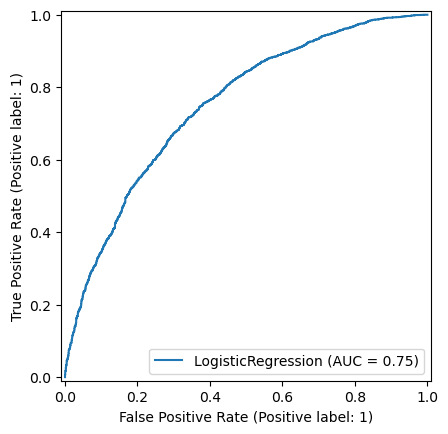

In [76]:
RocCurveDisplay.from_estimator(logreg, X_test, Y_test)
plt.show()

In [77]:
logreg_features_df = pd.DataFrame({"Feature": list(test_df.drop(["Training_Sample", "Recidivism_Within_3years"], axis=1).columns), 
                                   "Importance Abs": list(np.abs(logreg.coef_[0])), "Importance": list(logreg.coef_[0])})
logreg_features_df.sort_values(by=['Importance Abs'], ascending=False).drop(["Importance Abs"], axis=1)

,Feature,Importance
0,Percent_Days_Employed,-1.275263
3,Gang_Affiliated,0.790772
7,DrugTests_THC_Positive,0.764902
5,Age_at_Release,-0.390816
11,Prison_Offense_Violent/Sex,-0.303060
4,Prior_Arrest_Episodes_Felony,0.255591
1,Supervision_Risk_Score_First,0.187848
8,Prior_Arrest_Episodes_Misd,0.176324
13,Condition_MH_SA,0.157932
6,Prior_Arrest_Episodes_Property,0.124706


**K-NN**

In [79]:
knnpred = KNeighborsClassifier(n_neighbors=30)
knnpred.fit(X_train, Y_train)
accuracy = knnpred.score(X_test, Y_test)
accuracy

0.6779778393351801

In [80]:
metrics.confusion_matrix(Y_test, knnpred.predict(X_test))

array([[ 904,  851],
       [ 544, 2033]])

**Radius Neighbors**

In [82]:
radNeigh = RadiusNeighborsClassifier(radius=25.0)
radNeigh.fit(X_train, Y_train)
accuracy = radNeigh.score(X_test, Y_test)
accuracy

0.5948753462603878

In [83]:
metrics.confusion_matrix(Y_test, radNeigh.predict(X_test))

array([[   0, 1755],
       [   0, 2577]])

**Model Comparison**

In [85]:
models = {"Decision Tree": descTree, "Random Forest": rf, "Neural Network": ann, "Logistic Regression": logreg,
          "K-NN": knnpred,"Radius Neighbors": radNeigh}

output = {"Model Name": [], "Accuracy": [], "False Negative %": [], "False Positive %": [], "Recall": [], 
          "Precision": [], "AUC": []}

for model_name, model in models.items():
    # Model Performance Variables
    accuracy = round(model.score(X_test, Y_test) * 100, 3)
    con_mat = metrics.confusion_matrix(Y_test, model.predict(X_test))
    false_neg_percentage = round(con_mat[1,0] * 100 / Y_test.shape[0], 3)
    false_pos_percentage = round(con_mat[0,1] * 100 / Y_test.shape[0], 3)
    recall = round(recall_score(Y_test, model.predict(X_test), average='binary') * 100, 3)
    presicion = round(precision_score(Y_test, model.predict(X_test), average='binary') * 100, 3)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
    model_AUC = round(metrics.auc(fpr, tpr), 3)

    # Print
    output["Model Name"].append(model_name)
    output["Accuracy"].append(accuracy)
    output["False Negative %"].append(false_neg_percentage)
    output["False Positive %"].append(false_pos_percentage)
    output["Recall"].append(recall)
    output["Precision"].append(presicion)
    output["AUC"].append(model_AUC)
    

In [86]:
output_df = pd.DataFrame(output)
output_df.sort_values(by=['AUC'], ascending=False)

,Model Name,Accuracy,False Negative %,False Positive %,Recall,Precision,AUC
3,Logistic Regression,70.360,11.173,18.467,81.218,72.347,0.750
2,Neural Network,70.037,11.380,18.583,80.869,72.136,0.748
1,Random Forest,69.529,11.958,18.513,79.899,71.968,0.742
0,Decision Tree,69.806,12.765,17.428,78.541,72.832,0.738
4,K-NN,67.798,12.558,19.645,78.890,70.492,0.717
5,Radius Neighbors,59.488,0.000,40.512,100.000,59.488,0.500


**Predictions**

In [88]:
train_df.columns

Index(['Percent_Days_Employed', 'Supervision_Risk_Score_First',
       'Prior_Arrest_Episodes_PPViolationCharges', 'Gang_Affiliated',
       'Prior_Arrest_Episodes_Felony', 'Age_at_Release',
       'Prior_Arrest_Episodes_Property', 'DrugTests_THC_Positive',
       'Prior_Arrest_Episodes_Misd', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Prop', 'Prison_Offense_Violent/Sex',
       'Prison_Years', 'Condition_MH_SA', 'Training_Sample',
       'Recidivism_Within_3years'],
      dtype='object')

In [89]:
# Predictions
Percent_Days_Employed = 1
Supervision_Risk_Score_First = 2
Prior_Arrest_Episodes_PPViolationCharges = 1
Gang_Affiliated = 1
Prior_Arrest_Episodes_Felony = 1
Age_at_Release = 1
Prior_Arrest_Episodes_Property = 1
DrugTests_THC_Positive = 1
Prior_Arrest_Episodes_Misd = 1
Prior_Conviction_Episodes_Misd = 1
Prior_Conviction_Episodes_Prop = 1
Prison_Offense_Violent_Sex = 1
Prison_Years = 1
Condition_MH_SA = 1

vec_to_scale = np.array([[Supervision_Risk_Score_First, Prior_Arrest_Episodes_PPViolationCharges, 
                Prior_Arrest_Episodes_Felony, Age_at_Release, Prior_Arrest_Episodes_Property, 
                Prior_Arrest_Episodes_Misd, Prior_Conviction_Episodes_Misd, Prior_Conviction_Episodes_Prop, 
                Prison_Years]])

scaled_vec = list(scaler.transform(vec_to_scale)[0])

Supervision_Risk_Score_First, Prior_Arrest_Episodes_PPViolationCharges, Prior_Arrest_Episodes_Felony, Age_at_Release, Prior_Arrest_Episodes_Property, Prior_Arrest_Episodes_Misd, Prior_Conviction_Episodes_Misd, Prior_Conviction_Episodes_Prop, Prison_Years = scaled_vec

input_vec = np.array([[Percent_Days_Employed, Supervision_Risk_Score_First, Prior_Arrest_Episodes_PPViolationCharges, 
             Gang_Affiliated, Prior_Arrest_Episodes_Felony, Age_at_Release, Prior_Arrest_Episodes_Property, 
             DrugTests_THC_Positive, Prior_Arrest_Episodes_Misd, Prior_Conviction_Episodes_Misd, 
             Prior_Conviction_Episodes_Prop, Prison_Offense_Violent_Sex, Prison_Years, Condition_MH_SA]])

logreg.predict(input_vec)

array([1])

### Exporting Model and Scaler

In [91]:
input_vec

array([[ 1.        , -1.90146093, -0.66532631,  1.        , -1.49019376,
        -0.9428892 , -0.63647749,  1.        , -1.0061566 , -0.48921986,
        -0.08275545,  1.        , -0.36863236,  1.        ]])

In [92]:
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [93]:
# save the model to disk
filename = 'model.sav'
pickle.dump(logreg, open(filename, 'wb'))